In [1]:
%pip install wget

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import wget

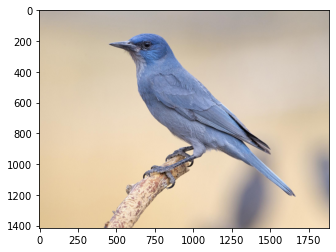

In [3]:
img_file = wget.download('https://raw.githubusercontent.com/LuFernandez/imagaynes/master/Color/bird.jpg')
img=cv2.imread(img_file)
new_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(new_img)

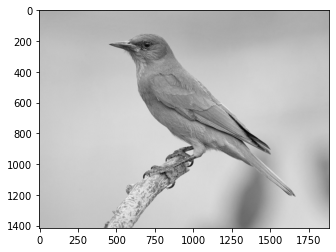

In [4]:
gray_img = np.zeros(shape = new_img.shape)
for i in range(0,3):
  gray_img[:,:,i] = new_img.sum(axis=2) / 3.
gray_img = gray_img.astype(int)
plt.imshow(gray_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


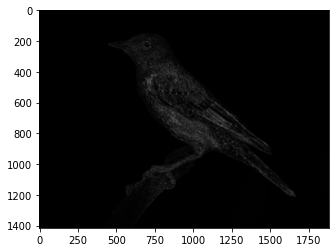

In [5]:
kernel = np.array([
                  [0,-1,0],
                  [-1,4,-1],
                  [0,-1,0]
                 ])
filtered_img = cv2.filter2D(gray_img.astype(float),-1,kernel)
plt.imshow(filtered_img.astype(int))

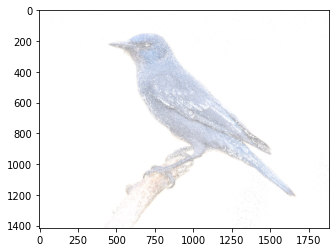

In [6]:
contrast_img = np.where(filtered_img>10,new_img,255 ) 
plt.imshow(contrast_img)

In [7]:
treshold = -130
blue = contrast_img[:,:,2].astype(float)
green = contrast_img[:,:,1].astype(float)
red = contrast_img[:,:,0].astype(float)

blueness = blue - green- red
blue_img = np.where( (blueness>treshold), gray_img[:,:,0], 0 )

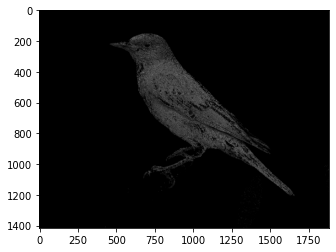

In [8]:
grayscale_blue_img = np.zeros(shape = (blue_img.shape[0], blue_img.shape[1], 3),dtype=int)
for i in range(0,3):
  grayscale_blue_img[:,:,i] = blue_img
plt.imshow(grayscale_blue_img.astype(int))

# Mascara del cuerpo del pajaro

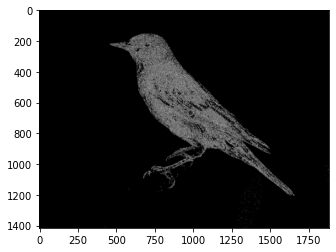

In [9]:
bird_mask = np.where(grayscale_blue_img>0,255,0)
plt.imshow(bird_mask)